<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Data Cleaning and EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

plt.style.use('bmh')

## Data Collections

In [2]:
train = pd.read_csv('../dataset/train.csv',
                    parse_dates = ["date"],
                    infer_datetime_format=True,)
test = pd.read_csv('../dataset/test.csv',
                   parse_dates = ["date"],
                   infer_datetime_format=True,)
transaction = pd.read_csv('../dataset/transactions.csv',
                          parse_dates = ["date"],
                          infer_datetime_format=True,) 
holiday = pd.read_csv('../dataset/holidays_events.csv',
                      parse_dates = ["date"],
                      infer_datetime_format=True,)
oil = pd.read_csv('../dataset/oil.csv',
                  parse_dates = ["date"],
                  infer_datetime_format=True,)
store = pd.read_csv('../dataset/stores.csv')

## Custom Installation / Codes

### Custom PIP

In [3]:
#pip install "jupyterlab>=3" "ipywidgets>=7.6;

In [4]:
def check_df(df):
    #check for df shape, null, and duplicate
    print('Dataset Statistics:')
    print(f'Shape of dataframe: {df.shape}')
    print('--------------------------------------')
    print(f'Null values in dataframe: {df.isna().sum().sum()}')
    print('--------------------------------------')
    print(f'% of Null values in dataframe: {round(((df.isna().sum().sum())/(df.shape[0])) * 100, 2)}%')
    print('--------------------------------------')
    print(f"Total duplicate rows: {df[df.duplicated()].shape[0]}")
    print(f"% duplicate rows: {round(df[df.duplicated()].shape[0] / df.shape[0] * 100, 2)}%")
    print('--------------------------------------')
    print(f'Column names: {df.columns}')
    print('--------------------------------------')
    print('\nVariable Types')
    print(f"Columns Count: \n{df.dtypes.value_counts()}")
    return df.head(3)

### Custom function

In [5]:
#custom function for data housekeeping
def data_housekeep(dfs):
    for df in dfs:
        #changing all to lower case
        df.columns = df.columns.str.lower()      

In [6]:
#custom fuction for adding month, year and week features
def add_periods(df,date_col):
    df['year'] = df[date_col].dt.year
    df['month'] = df[date_col].dt.month
    df['week']= df[date_col].dt.isocalendar().week
    df['weekday']= df[date_col].dt.day_name()
    return df.head(3)

In [7]:
def format_number(data_value, indx):
    if data_value >= 1_000_000:
        formatter = '{:1.1f}M'.format(data_value*0.000_001)
    else:
        formatter = '{:1.0f}K'.format(data_value*0.001)
    return formatter

### Custom plots Style

In [8]:
plt.style.use('bmh')

## Data Clean

### Train & Test Dataset 

In [9]:
check_df(train)

Dataset Statistics:
Shape of dataframe: (3000888, 6)
--------------------------------------
Null values in dataframe: 0
--------------------------------------
% of Null values in dataframe: 0.0%
--------------------------------------
Total duplicate rows: 0
% duplicate rows: 0.0%
--------------------------------------
Column names: Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion'], dtype='object')
--------------------------------------

Variable Types
Columns Count: 
int64             3
datetime64[ns]    1
object            1
float64           1
dtype: int64


,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0


<b> Findings: </b>
Train data set is clean with no null values.

Checking the time series

In [10]:
min(train.date),max(train.date)

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-08-15 00:00:00'))

In [11]:
pd.date_range(start = '2013-01-01', end = '2017-08-15' ).difference(train.date)

DatetimeIndex(['2013-12-25', '2014-12-25', '2015-12-25', '2016-12-25'], dtype='datetime64[ns]', freq=None)

<b> Findings: </b>
There seem to have missing sale dates in the data set. We can see that during xmas the entire chain is on holiday. We will impute the missing dates with no sales.

In [12]:
dates = pd.date_range(start=min(train['date']),end=max(train['date']))
dates = pd.DataFrame(dates, columns=['date'])
train = dates.merge(train,on='date',how='left')

In [13]:
train['sales'] = train['sales'].fillna(0)
train['onpromotion'] = train['onpromotion'].fillna(0)
train['store_nbr'] = train['store_nbr'].fillna(train['store_nbr'].value_counts().index[0])
train['family'] = train['family'].fillna(train['family'].value_counts().index[0])

In [14]:
add_periods(train,'date')

,date,id,store_nbr,family,sales,onpromotion,year,month,week,weekday
0,2013-01-01,0.0,1.0,AUTOMOTIVE,0.0,0.0,2013,1,1,Tuesday
1,2013-01-01,1.0,1.0,BABY CARE,0.0,0.0,2013,1,1,Tuesday
2,2013-01-01,2.0,1.0,BEAUTY,0.0,0.0,2013,1,1,Tuesday


### Test Dataset

In [15]:
check_df(test)

Dataset Statistics:
Shape of dataframe: (28512, 5)
--------------------------------------
Null values in dataframe: 0
--------------------------------------
% of Null values in dataframe: 0.0%
--------------------------------------
Total duplicate rows: 0
% duplicate rows: 0.0%
--------------------------------------
Column names: Index(['id', 'date', 'store_nbr', 'family', 'onpromotion'], dtype='object')
--------------------------------------

Variable Types
Columns Count: 
int64             3
datetime64[ns]    1
object            1
dtype: int64


,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2


In [16]:
min(test.date),max(test.date)

(Timestamp('2017-08-16 00:00:00'), Timestamp('2017-08-31 00:00:00'))

In [17]:
pd.date_range(start = '2017-08-16', end = '2017-08-31' ).difference(test.date)

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

In [18]:
add_periods(test,'date')

,id,date,store_nbr,family,onpromotion,year,month,week,weekday
0,3000888,2017-08-16,1,AUTOMOTIVE,0,2017,8,33,Wednesday
1,3000889,2017-08-16,1,BABY CARE,0,2017,8,33,Wednesday
2,3000890,2017-08-16,1,BEAUTY,2,2017,8,33,Wednesday


### Holiday Dataset

In [19]:
check_df(holiday)

Dataset Statistics:
Shape of dataframe: (350, 6)
--------------------------------------
Null values in dataframe: 0
--------------------------------------
% of Null values in dataframe: 0.0%
--------------------------------------
Total duplicate rows: 0
% duplicate rows: 0.0%
--------------------------------------
Column names: Index(['date', 'type', 'locale', 'locale_name', 'description', 'transferred'], dtype='object')
--------------------------------------

Variable Types
Columns Count: 
object            4
datetime64[ns]    1
bool              1
dtype: int64


,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False


In [20]:
min(holiday.date),max(holiday.date)

(Timestamp('2012-03-02 00:00:00'), Timestamp('2017-12-26 00:00:00'))

In [21]:
holiday.locale.unique()

array(['Local', 'Regional', 'National'], dtype=object)

Check for duplicate date in the holidays dataset

In [22]:
holiday[holiday.duplicated(subset = ['locale','locale_name','date'],keep =False)]

,date,type,locale,locale_name,description,transferred
35,2012-12-24,Bridge,National,Ecuador,Puente Navidad,False
36,2012-12-24,Additional,National,Ecuador,Navidad-1,False
39,2012-12-31,Bridge,National,Ecuador,Puente Primer dia del ano,False
40,2012-12-31,Additional,National,Ecuador,Primer dia del ano-1,False
156,2014-12-26,Bridge,National,Ecuador,Puente Navidad,False
157,2014-12-26,Additional,National,Ecuador,Navidad+1,False
235,2016-05-01,Holiday,National,Ecuador,Dia del Trabajo,False
236,2016-05-01,Event,National,Ecuador,Terremoto Manabi+15,False
242,2016-05-07,Additional,National,Ecuador,Dia de la Madre-1,False
243,2016-05-07,Event,National,Ecuador,Terremoto Manabi+21,False


In [23]:
holiday.drop_duplicates(subset = ['locale','locale_name','date'],keep='first', inplace=True)

In [24]:
holiday[(holiday.date >= '2013-10-09') & (holiday.date <= '2013-10-12') ]

,date,type,locale,locale_name,description,transferred
72,2013-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
73,2013-10-11,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False


### Store Dataset

In [26]:
check_df(store)

Dataset Statistics:
Shape of dataframe: (54, 5)
--------------------------------------
Null values in dataframe: 0
--------------------------------------
% of Null values in dataframe: 0.0%
--------------------------------------
Total duplicate rows: 0
% duplicate rows: 0.0%
--------------------------------------
Column names: Index(['store_nbr', 'city', 'state', 'type', 'cluster'], dtype='object')
--------------------------------------

Variable Types
Columns Count: 
object    3
int64     2
dtype: int64


,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8


In [27]:
store.state.unique()

array(['Pichincha', 'Santo Domingo de los Tsachilas', 'Cotopaxi',
       'Chimborazo', 'Imbabura', 'Bolivar', 'Pastaza', 'Tungurahua',
       'Guayas', 'Santa Elena', 'Los Rios', 'Azuay', 'Loja', 'El Oro',
       'Esmeraldas', 'Manabi'], dtype=object)

In [28]:
store.city.unique()

array(['Quito', 'Santo Domingo', 'Cayambe', 'Latacunga', 'Riobamba',
       'Ibarra', 'Guaranda', 'Puyo', 'Ambato', 'Guayaquil', 'Salinas',
       'Daule', 'Babahoyo', 'Quevedo', 'Playas', 'Libertad', 'Cuenca',
       'Loja', 'Machala', 'Esmeraldas', 'Manta', 'El Carmen'],
      dtype=object)

### Transaction Dataset

In [29]:
check_df(transaction)

Dataset Statistics:
Shape of dataframe: (83488, 3)
--------------------------------------
Null values in dataframe: 0
--------------------------------------
% of Null values in dataframe: 0.0%
--------------------------------------
Total duplicate rows: 0
% duplicate rows: 0.0%
--------------------------------------
Column names: Index(['date', 'store_nbr', 'transactions'], dtype='object')
--------------------------------------

Variable Types
Columns Count: 
int64             2
datetime64[ns]    1
dtype: int64


,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358


In [30]:
min(transaction.date),max(transaction.date)

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-08-15 00:00:00'))

### Oil Dataset

In [31]:
check_df(oil)

Dataset Statistics:
Shape of dataframe: (1218, 2)
--------------------------------------
Null values in dataframe: 43
--------------------------------------
% of Null values in dataframe: 3.53%
--------------------------------------
Total duplicate rows: 0
% duplicate rows: 0.0%
--------------------------------------
Column names: Index(['date', 'dcoilwtico'], dtype='object')
--------------------------------------

Variable Types
Columns Count: 
datetime64[ns]    1
float64           1
dtype: int64


,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97


In [32]:
min(oil.date),max(oil.date)

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-08-31 00:00:00'))

In [33]:
pd.date_range(start = '2017-08-16', end = '2017-08-31' ).difference(oil.date)

DatetimeIndex(['2017-08-19', '2017-08-20', '2017-08-26', '2017-08-27'], dtype='datetime64[ns]', freq=None)

In [34]:
add_periods(oil,'date')

,date,dcoilwtico,year,month,week,weekday
0,2013-01-01,NaN,2013,1,1,Tuesday
1,2013-01-02,93.14,2013,1,1,Wednesday
2,2013-01-03,92.97,2013,1,1,Thursday


<AxesSubplot:title={'center':'Crude Oil Price'}, xlabel='date'>

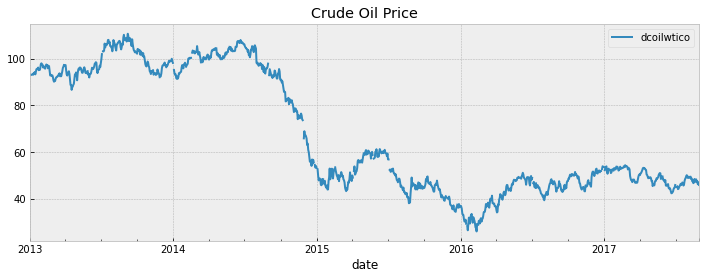

In [35]:
oil.plot(x='date', y= 'dcoilwtico',figsize=(12,4),title = 'Crude Oil Price')

From the graph we can see that there is are some breakage, those are the missing values. Thus we will be using backfill to fill up the 43 null values.

In [36]:
oil.fillna(method='bfill',inplace=True)

### Dataset Merging

#### Train Set

In [37]:
train_store = pd.merge(train, store, on = ['store_nbr'], how = 'left')
train_store.rename(columns = {'type': 'store_type'},inplace = True)

In [38]:
train_holi_local = pd.merge(train_store, holiday[holiday.locale == 'Local'], left_on =[ 'date','city'], right_on =['date', 'locale_name'], how ='inner')
train_holi_region = pd.merge(train_store,holiday[holiday.locale == 'Regional'], left_on =[ 'date','state'], right_on =['date', 'locale_name'], how ='inner')
train_holi_national = pd.merge(train_store,holiday[holiday.locale == 'National'], on =['date'], how ='inner')
conc_holi = pd.concat([train_holi_local, train_holi_region,train_holi_national])
conc_holi.drop_duplicates(subset = ['id'],keep='last', inplace=True)
conc_holi.rename(columns = {'type': 'holiday_type'},inplace = True)

In [39]:
train_store_holiday = pd.merge(train_store, conc_holi[['id','holiday_type','locale','transferred']], on = ['id'], how = 'left')

In [40]:
train_store_holiday_oil = pd.merge(train_store_holiday, oil[['date','dcoilwtico']], on = ['date'], how = 'left')

In [41]:
train_combined = pd.merge(train_store_holiday_oil,transaction,on = ['date','store_nbr'], how = 'left')
train_combined.head()

,date,id,store_nbr,family,sales,onpromotion,year,month,week,weekday,city,state,store_type,cluster,holiday_type,locale,transferred,dcoilwtico,transactions
0,2013-01-01,0.0,1.0,AUTOMOTIVE,0.0,0.0,2013,1,1,Tuesday,Quito,Pichincha,D,13,Holiday,National,False,93.14,NaN
1,2013-01-01,1.0,1.0,BABY CARE,0.0,0.0,2013,1,1,Tuesday,Quito,Pichincha,D,13,Holiday,National,False,93.14,NaN
2,2013-01-01,2.0,1.0,BEAUTY,0.0,0.0,2013,1,1,Tuesday,Quito,Pichincha,D,13,Holiday,National,False,93.14,NaN
3,2013-01-01,3.0,1.0,BEVERAGES,0.0,0.0,2013,1,1,Tuesday,Quito,Pichincha,D,13,Holiday,National,False,93.14,NaN
4,2013-01-01,4.0,1.0,BOOKS,0.0,0.0,2013,1,1,Tuesday,Quito,Pichincha,D,13,Holiday,National,False,93.14,NaN


Let check the NAs in the new combined dataframe

In [42]:
for col in train_combined:
    print(f'{col}: {train_combined[col].isna().sum().sum()}')

date: 0
id: 4
store_nbr: 0
family: 0
sales: 0
onpromotion: 0
year: 0
month: 0
week: 0
weekday: 0
city: 0
state: 0
store_type: 0
cluster: 0
holiday_type: 2733291
locale: 2733291
transferred: 2733291
dcoilwtico: 857143
transactions: 245788


#### Update Nan of transactions columns

In [43]:
train_combined['transactions'] = train_combined.apply(
    lambda row: 0 if np.isnan(row['transactions']) else row['transactions'],
    axis=1)

In [44]:
train_combined['transactions'].isna().sum().sum()

0

#### Update Nan of the holiday columns 

In [45]:
#see the unique values of each columns
for col in ['holiday_type','locale','transferred']:
    print(f'{col}: {train_combined[col].unique()} \
         \n--------------------------------------'\
         '---------------------------------------')

holiday_type: ['Holiday' nan 'Work Day' 'Additional' 'Event' 'Transfer' 'Bridge']          
-----------------------------------------------------------------------------
locale: ['National' nan 'Local' 'Regional']          
-----------------------------------------------------------------------------
transferred: [False nan True]          
-----------------------------------------------------------------------------


In [46]:
#update the Nan with values
train_combined['holiday_type'] = train_combined['holiday_type'].fillna('Work Day')
train_combined['locale'] = train_combined['locale'].fillna('National')
train_combined['transferred'] = train_combined['transferred'].fillna(False)

In [47]:
for col in ['holiday_type','locale','transferred']:
    print(f'{col}: {train_combined[col].isna().sum().sum()}')

holiday_type: 0
locale: 0
transferred: 0


#### Update Nan of the dcoilwtico (crude oil price)

In [48]:
train_combined['dcoilwtico'].fillna(method='bfill',inplace=True)
print(f'dcoilwtico : {train_combined["dcoilwtico"].isna().sum().sum()}')

dcoilwtico : 0


In [49]:
train_combined.set_index('date', inplace = True);

In [50]:
train_combined.drop(columns = 'id',inplace = True);

#### Test Set

In [51]:
test_store = pd.merge(test, store, on = ['store_nbr'], how = 'left')
test_store.rename(columns = {'type': 'store_type'},inplace = True)

In [52]:
test_store_holiday = pd.merge(test_store, conc_holi[['id','holiday_type','locale','transferred']], on = ['id'], how = 'left')

In [53]:
test_store_holiday_oil = pd.merge(test_store_holiday, oil[['date','dcoilwtico']], on = ['date'], how = 'left')

In [54]:
test_combined = test_store_holiday_oil

In [55]:
for col in test_combined:
    print(f'{col}: {test_combined[col].isna().sum().sum()}')

id: 0
date: 0
store_nbr: 0
family: 0
onpromotion: 0
year: 0
month: 0
week: 0
weekday: 0
city: 0
state: 0
store_type: 0
cluster: 0
holiday_type: 28512
locale: 28512
transferred: 28512
dcoilwtico: 7128


In [56]:
test_combined['holiday_type'] = test_combined['holiday_type'].fillna('Work Day')
test_combined['locale'] = test_combined['locale'].fillna('National')
test_combined['transferred'] = test_combined['transferred'].fillna(False)

In [57]:
test_combined['dcoilwtico'].fillna(method='bfill',inplace=True)

### Featured Engineer

In [58]:
conditions = [
    (train_combined['holiday_type'] == 'Holiday') & \
    (train_combined['transferred'] == True),
    (train_combined['holiday_type'] == 'Holiday') & \
    (train_combined['transferred'] == False),
    (train_combined['holiday_type'] == 'Additional') |\
    (train_combined['holiday_type'] == 'Transfer') |\
    (train_combined['holiday_type'] == 'Bridge') ,
    (train_combined['holiday_type'] == 'Work Day') |\
    (train_combined['holiday_type'] == 'Event')
    ]

values = [0, 1, 1, 0]

train_combined['isholiday'] = np.select(conditions, values)


In [59]:
train_combined['isholiday'].isna().sum()

0

### Export the Train & Test Data Set

In [62]:
train_combined.to_csv('../dataset/train_final.csv')

In [63]:
test_combined.to_csv('../dataset/test_final.csv')

## EDA

In [64]:
features = train_combined[['store_nbr','family','city','state','store_type','cluster','holiday_type','locale']]

for item in features:
    count = len(train_combined[item].unique())
    print(f'{item} : {count} unique feature')

store_nbr : 54 unique feature
family : 33 unique feature
city : 22 unique feature
state : 16 unique feature
store_type : 5 unique feature
cluster : 17 unique feature
holiday_type : 6 unique feature
locale : 3 unique feature


<b> Lets Take a look at Corporación Favorita Sales Performace </b>

### Annual Sales

In [65]:
annual_sales = train_combined[~((train_combined.year == 2017
                                ) & (train_combined.month == 8
                                    ))].groupby(["month","year"]).sum().sales
annually= annual_sales.unstack()

In [180]:
annually

year,2013,2014,2015,2016,2017
month,,,,,
1,1.032762e+07,1.891164e+07,1.489692e+07,2.397780e+07,2.632816e+07
2,9.658960e+06,1.203835e+07,1.374240e+07,2.194741e+07,2.325011e+07
3,1.142850e+07,2.036558e+07,1.559861e+07,2.313178e+07,2.670402e+07
4,1.099346e+07,1.286125e+07,1.495507e+07,2.596303e+07,2.589531e+07
5,1.159770e+07,1.337979e+07,1.773037e+07,2.477943e+07,2.691185e+07
6,1.168934e+07,1.331996e+07,2.161536e+07,2.220922e+07,2.568282e+07
7,1.125740e+07,1.942189e+07,2.220962e+07,2.346267e+07,2.701148e+07
8,1.173779e+07,1.388518e+07,2.296367e+07,2.245241e+07,NaN
9,1.179293e+07,2.002242e+07,2.324088e+07,2.241745e+07,NaN


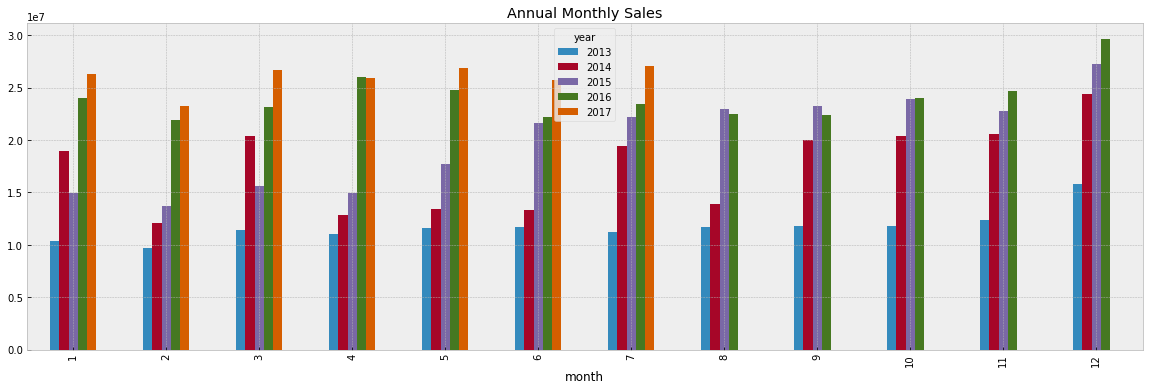

In [140]:
annually.plot(kind = 'bar',figsize = (20,6), title= 'Annual Monthly Sales');

In [67]:
weekly_sales = train_combined[~((train_combined.year == 2017
                                ) & (train_combined.week == 33
                                    ))].groupby(["week","year"]).sum().sales
weekly = weekly_sales.unstack()

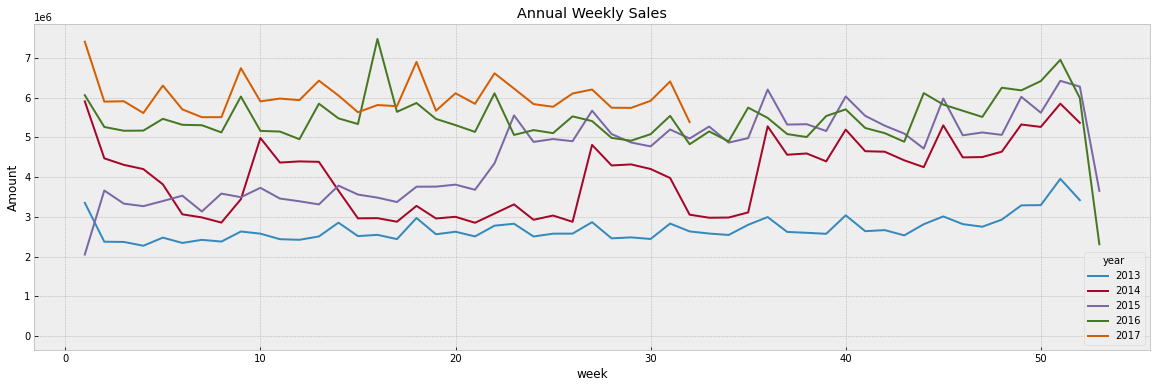

In [68]:
weekly.plot(figsize = (20,6), title = 'Annual Weekly Sales',  ylabel = 'Amount' );

### Annual Sales by family

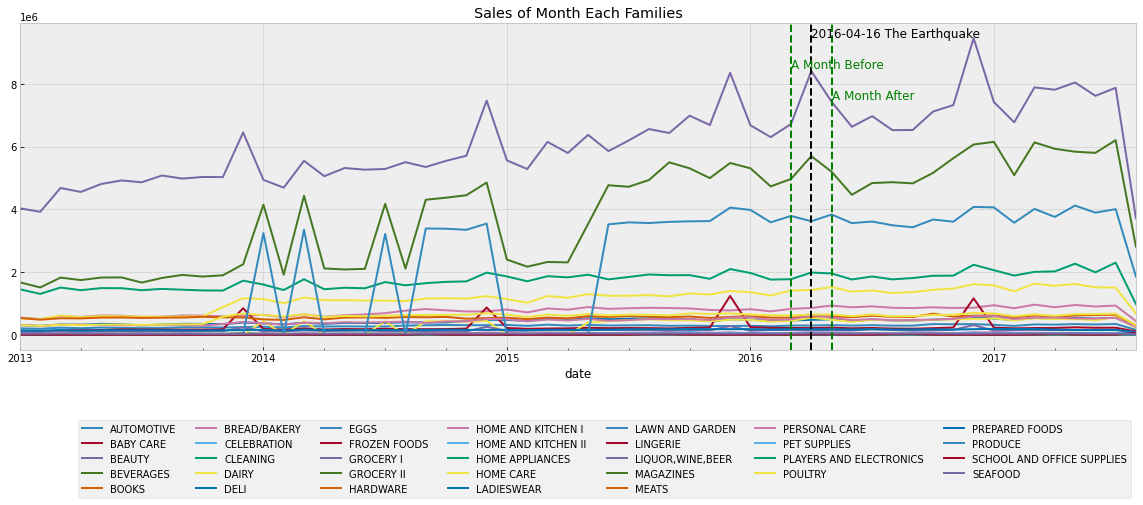

In [186]:
date_fam_sales = train_combined.groupby(["date","family"]).sum().sales

unstack = date_fam_sales.unstack()
unstack = unstack.resample('1M').sum()
#unstack = unstack.sum()


fig,ax = plt.subplots(figsize=(20,6))
ax = unstack.plot(ax=ax)
ax.set_title('Sales of Month Each Families')
plt.axvline(pd.Timestamp('2016-04-16'),linestyle='dashed',color='Black')
plt.axvline(pd.Timestamp('2016-03-16'),linestyle='dashed',color='Green')
plt.axvline(pd.Timestamp('2016-05-16'),linestyle='dashed',color='Green')

plt.text(pd.Timestamp('2016-04-16'),9500000,'2016-04-16 The Earthquake',size=12)
plt.text(pd.Timestamp('2016-03-16'),8500000,'A Month Before',size=12,color='Green')
plt.text(pd.Timestamp('2016-05-16'),7500000,'A Month After',size=12,color='Green')

plt.legend(bbox_to_anchor=(1,-.2),ncol=7);

<b>Findings:</b> Although there is a drop of sales after the earthquake mainly due to the earthquake recovery period where there were food reliefs.

In [70]:
family_sales = train_combined.groupby('family')['sales'].agg(['mean']).sort_values(by = 'mean',ascending=True)

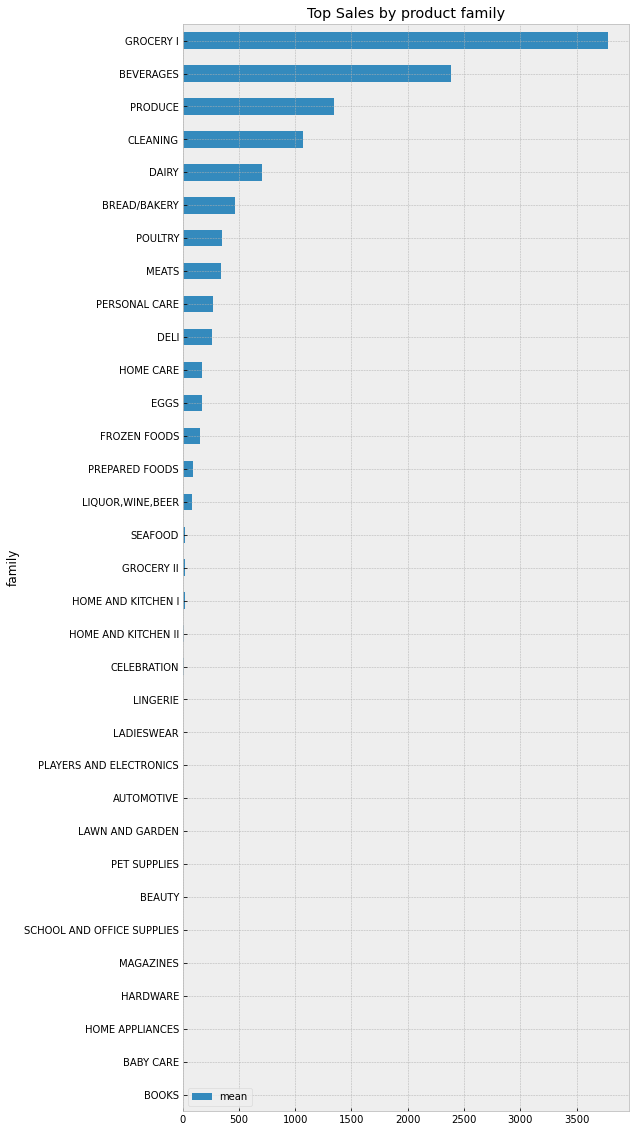

In [123]:
family_sales.plot(kind = 'barh',figsize = (8,20), title= 'Top Sales by product family');

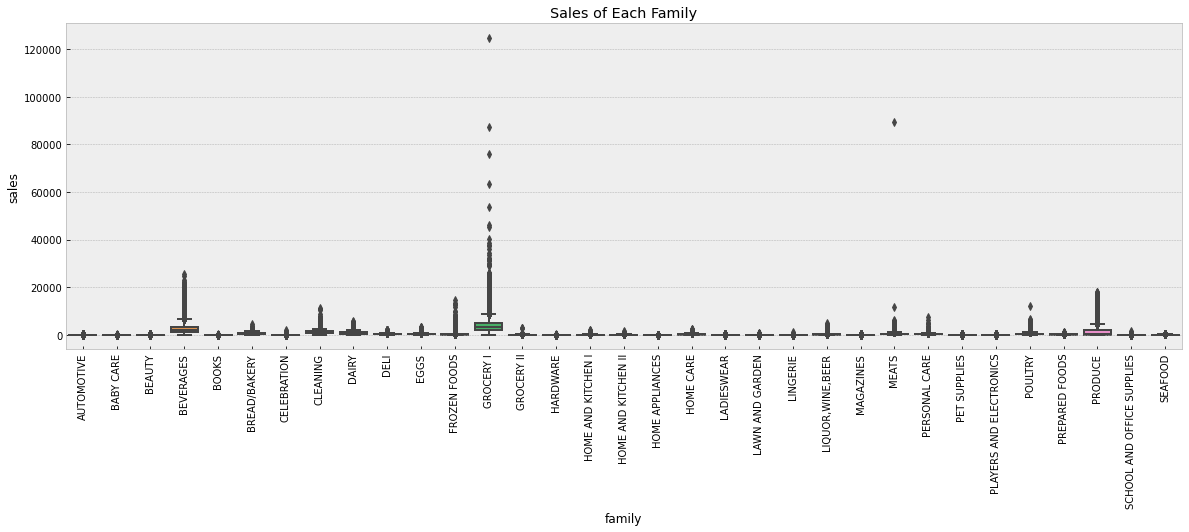

In [187]:
fig,ax=plt.subplots(figsize=(20,6))

ax = sns.boxplot(x='family',y='sales',data=train_combined)
ax.set_title('Sales of Each Family' )
ax = plt.xticks(rotation=90)

<b>Findings:</b> Spotted a few outliers. Especially in the Meat Family.

In [156]:
train_combined[train_combined.sales > 40000].sort_values(by = 'sales',ascending = False)

,store_nbr,family,sales,onpromotion,year,month,week,weekday,city,state,store_type,cluster,holiday_type,locale,transferred,dcoilwtico,transactions,isholiday
date,,,,,,,,,,,,,,,,,,
2016-05-02,2.0,GROCERY I,124717.000,59.0,2016,5,18,Monday,Quito,Pichincha,D,13,Event,National,False,44.75,1905.0,0
2016-10-07,39.0,MEATS,89576.360,0.0,2016,10,40,Friday,Cuenca,Azuay,B,6,Work Day,National,False,49.76,1295.0,0
2016-04-21,20.0,GROCERY I,87438.516,53.0,2016,4,16,Thursday,Quito,Pichincha,B,6,Event,National,False,43.18,1692.0,0
2016-04-18,45.0,GROCERY I,76090.000,38.0,2016,4,16,Monday,Quito,Pichincha,A,11,Event,National,False,39.74,3895.0,0
2016-04-26,2.0,GROCERY I,63434.000,30.0,2016,4,17,Tuesday,Quito,Pichincha,D,13,Event,National,False,42.52,1778.0,0
2016-04-21,45.0,GROCERY I,53874.000,44.0,2016,4,16,Thursday,Quito,Pichincha,A,11,Event,National,False,43.18,3079.0,0
2013-11-12,44.0,GROCERY I,46271.000,0.0,2013,11,46,Tuesday,Quito,Pichincha,A,5,Work Day,National,False,93.12,3577.0,0
2014-12-08,35.0,GROCERY I,45361.000,3.0,2014,12,50,Monday,Playas,Guayas,C,3,Work Day,National,False,63.13,624.0,0
2015-12-14,35.0,GROCERY I,40351.460,7.0,2015,12,51,Monday,Playas,Guayas,C,3,Work Day,National,False,36.31,594.0,0


<b>Findings:</b> The date of outlier in meat was on 2016-10-07, could an data error but still need fufther varificatiion.

### Annual Sales by Store

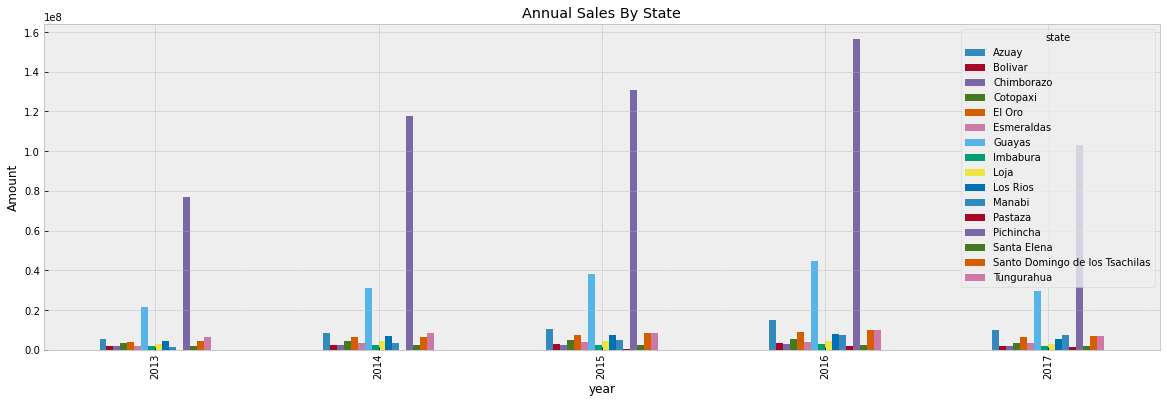

In [72]:
date_store_sales = train_combined.groupby(["year","state"]).sum().sales
store = date_store_sales.unstack()
store.plot(figsize = (20,6), title = 'Annual Sales By State',  ylabel = 'Amount', kind = 'bar' );

In [73]:
train_combined.groupby('state')['store_nbr'].nunique().sort_values(ascending=False).reset_index(name='count')

,state,count
0,Pichincha,19
1,Guayas,11
2,Azuay,3
3,Manabi,3
4,Santo Domingo de los Tsachilas,3
5,Cotopaxi,2
6,El Oro,2
7,Los Rios,2
8,Tungurahua,2
9,Bolivar,1


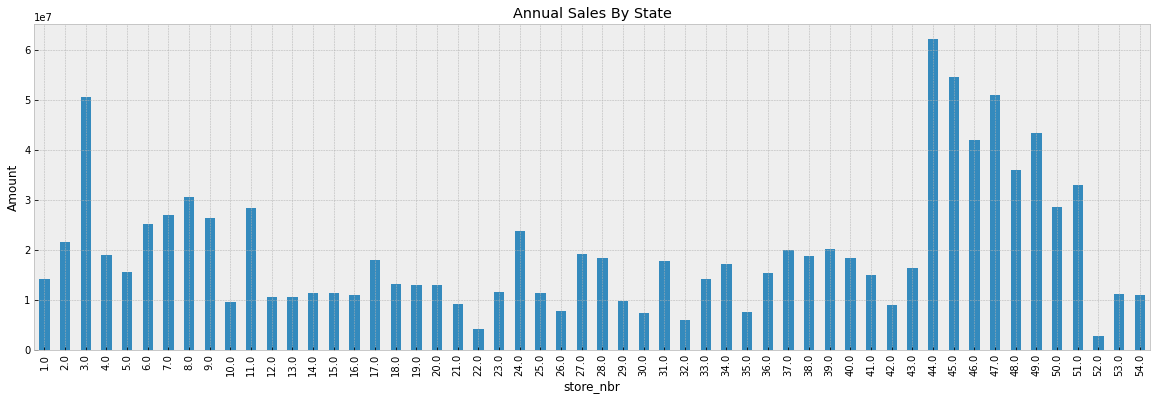

In [177]:
date_store_sales = train_combined.groupby(["store_nbr"]).sum().sales
#store = date_store_sales.unstack()
date_store_sales.plot(figsize = (20,6), title = 'Annual Sales By State',  ylabel = 'Amount', kind = 'bar' );

<b>Findings:</b> We can see that store 3,44,45,46,47,48,49 are Favourita Top stores

### Sales during Holiday

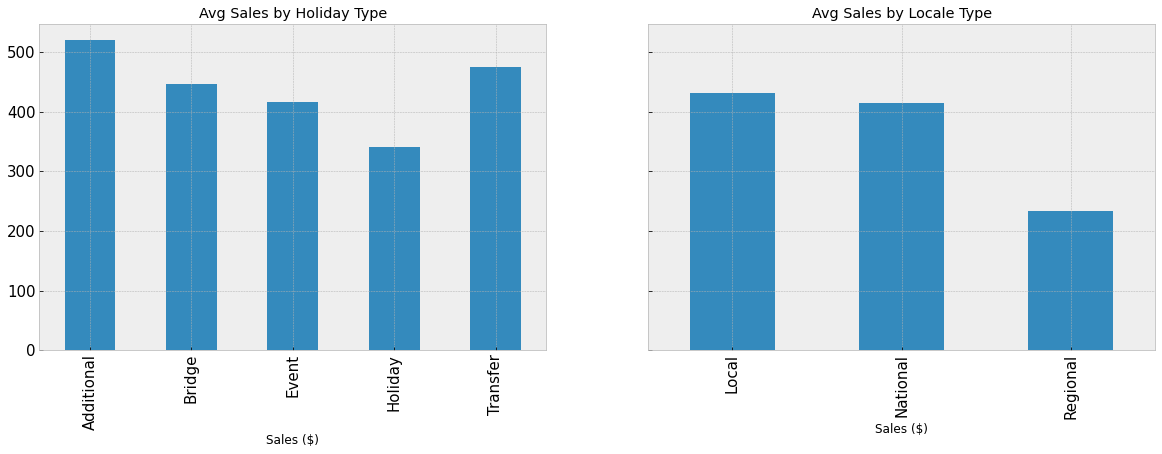

In [76]:
holiday_sales = train_combined[train_combined.holiday_type != 'Work Day'].groupby(["holiday_type"]).mean().sales

local_sales = train_combined[train_combined.holiday_type != 'Work Day'].groupby(["locale"]).mean().sales

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2 , sharey = True, )
ax = holiday_sales.plot(kind="bar", figsize = (20,6), fontsize = 15, ax=ax1 )
ax.set_title("Avg Sales by Holiday Type")
ax.set_xlabel("Sales ($)")

ax = local_sales.plot(kind="bar", figsize = (20,6), fontsize = 15, ax=ax2 )
ax.set_title("Avg Sales by Locale Type")
ax.set_xlabel("Sales ($)");

In [77]:
train_combined[train_combined.holiday_type == 'Work Day'].groupby(["locale"]).mean().sales

locale
National    352.457065
Name: sales, dtype: float64

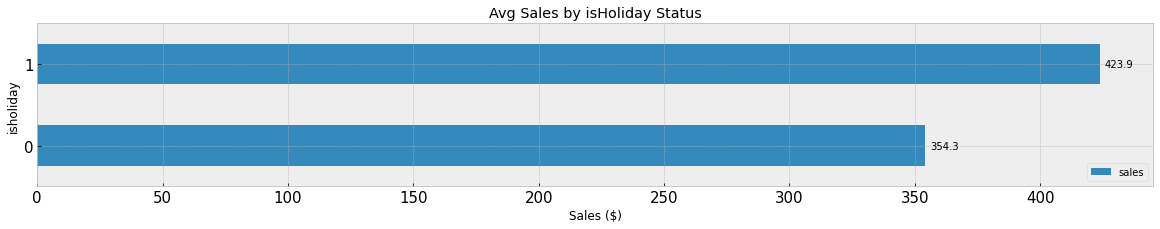

In [78]:
holiday_sales = train_combined.groupby('isholiday').agg({"sales" : "mean"})
holiday_sales.sales = round(holiday_sales.sales, 2)

ax = holiday_sales.plot(kind="barh", figsize = (20,3), fontsize = 15 )
ax.set_title("Avg Sales by isHoliday Status")
ax.set_xlabel("Sales ($)")

rects = ax.patches
labels = [f"label{i}" for i in range(len(rects))]

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: Place label left of bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label at right
        ha = 'right'

    # Use X value as label and format number with one decimal place
    label = "{:.1f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha)                     # Horizontally align label differently for
                                    # positive and negative values.

<b>Findings: </b> We can see that holiday sales are usually better.

### Sales by weekdays

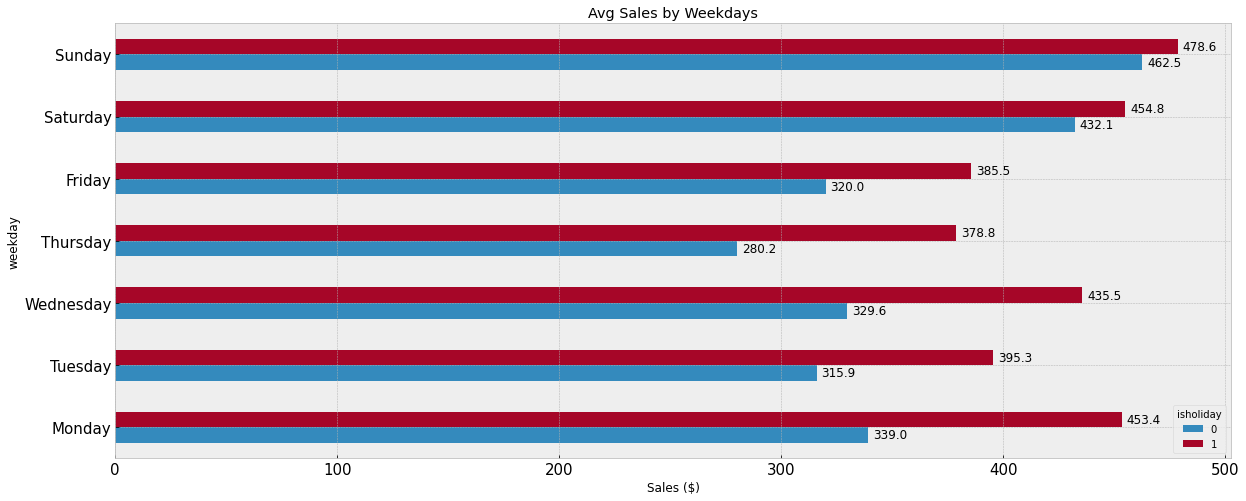

In [103]:
days = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
train_combined['weekday']=pd.Categorical(train_combined['weekday'],categories=days,ordered=True)
sorted_weekday= pd.pivot_table(train_combined, values = 'sales', columns = 'isholiday', index = 'weekday' ).sort_values('weekday')

ax = sorted_weekday.plot(kind="barh", figsize = (20,8), fontsize = 15)
ax.set_title("Avg Sales by Weekdays")
ax.set_xlabel("Sales ($)")

rects = ax.patches
labels = [f"label{i}" for i in range(len(rects))]

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: Place label left of bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label at right
        ha = 'right'

    # Use X value as label and format number with one decimal place
    label = "{:.1f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        fontsize = 12,              # fontsize
        va='center',                # Vertically center label
        ha=ha)                      # Horizontally align label differently for
                                    # positive and negative values.

<b>Findings: </b> We already know that holiday sales are usually better from the previous plot. From this plot we can see that weekends sales are usually better then weekdays.

### Sales vs Oil Price

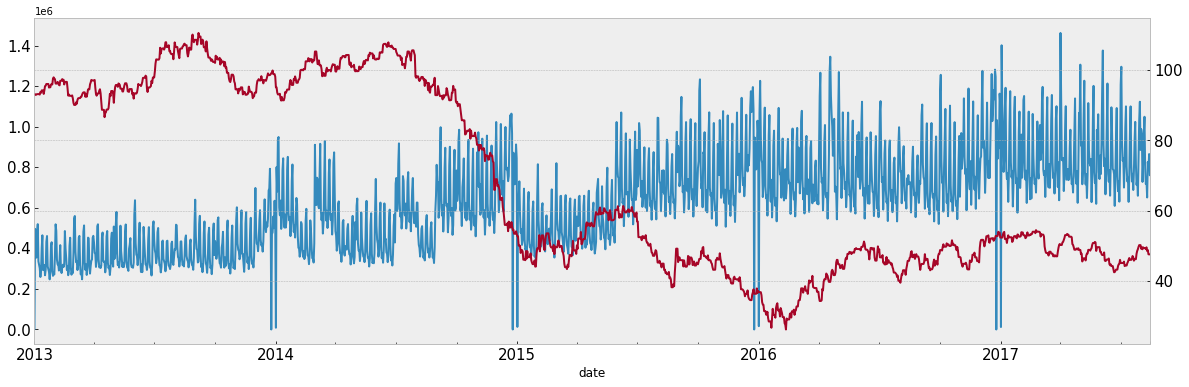

In [119]:
#oil day sales
sales = train_combined.groupby(["date"]).sum().sales
oil_sales = train_combined.groupby(["date"]).mean().dcoilwtico

unstack = date_fam_sales.unstack()
unstack = unstack.resample('1M').sum()

fig, ax = plt.subplots(figsize=(20,6))
sales.plot(ax=ax ,fontsize = 15 )
oil_sales.plot( ax=ax, fontsize = 15, kind = 'line' ,secondary_y = True);

As there are presence of uptrend of sales in the plot, let check are the number of stores consistant throughout the years.

In [82]:
train_combined.groupby('year')['store_nbr'].nunique().sort_values(ascending=False).reset_index(name='count')

,year,count
0,2013,54
1,2014,54
2,2015,54
3,2016,54
4,2017,54


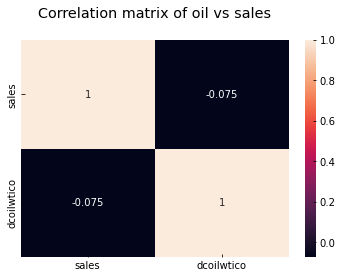

In [118]:
corr_plot = sns.heatmap(train_combined[["sales","dcoilwtico"]].corr(), annot = True)
corr_plot.set(title = 'Correlation matrix of oil vs sales\n');

<b>Findings: </b> It seems that the oil prices are mildly inversely correlated with sales.